# <span style="color:#900C3F"> Laboratorio di Simulazione Numerica</span>

# <span style="color: #C70039 "> Esercitazione 7</span>

### <span style="color: #FF5733 "> Esercizio 07.1</span>

Il codice fornitoci simula il comportamento di un insieme di particelle in un box nell'*ensemble* canonico. In particolare, usa l'algoritmo di Metropolis per campionare il peso di Boltzmann: le posizioni successive sono campionate secondo Boltzmann e non sono da interpretare come la traiettoria delle particelle. Il codice è cosi in grado di fornire una stima delle quantità termodinamiche di interesse. Inoltre il codice tiene conto delle *tail correction*: visto che si usa un potenziale con un cutoff ad un certo raggio $r_c$, i risultati della simulazione vengono corretti per tenere conto anche delle interazioni a lungo range.

Ho aggiunto al codice la possibilità di ricordare la configurazione precedentemente raggiunta dal sistema e ripartire da quella: quando la variabile *restart* vale zero la configurazione iniziale viene letta da file di input (che contiene la descrizione di una configurazione FCC) e quella finale salvata su file di output. Quando invece la variabile *restart* vale 1 la configurazione iniziale viene letta dal precedente file di output. Ho inoltre implementato la realizzazione della regola empirica che suggerisce di avere accettanza pari a circa $1/2$: dopo che la configurazione del sistema è stata equilibrata con i primi passi, quando *restart* vale 1 viene realizzata in modo automatico la scelta ottimale del parametro $\delta$. 

Ho aggiunto al codice la possibilità di stampare i valori istananei di energia e pressione. Ho osservato che dopo 1000 step il sistema si può ragionevolmente considerare ben equilibrato (infatti i valori istantanei di energia e pressione diventano stazionari).  
Ho quindi eseguito il codice mettendo *restart* a zero e realizzando un unico blocco da 1000 step. Ho poi eseguito nuovamente il codice mettendo *restart* a uno e aumentando il numero di blocchi e con i dati acquisiti ho realizzato i grafici sottostanti:

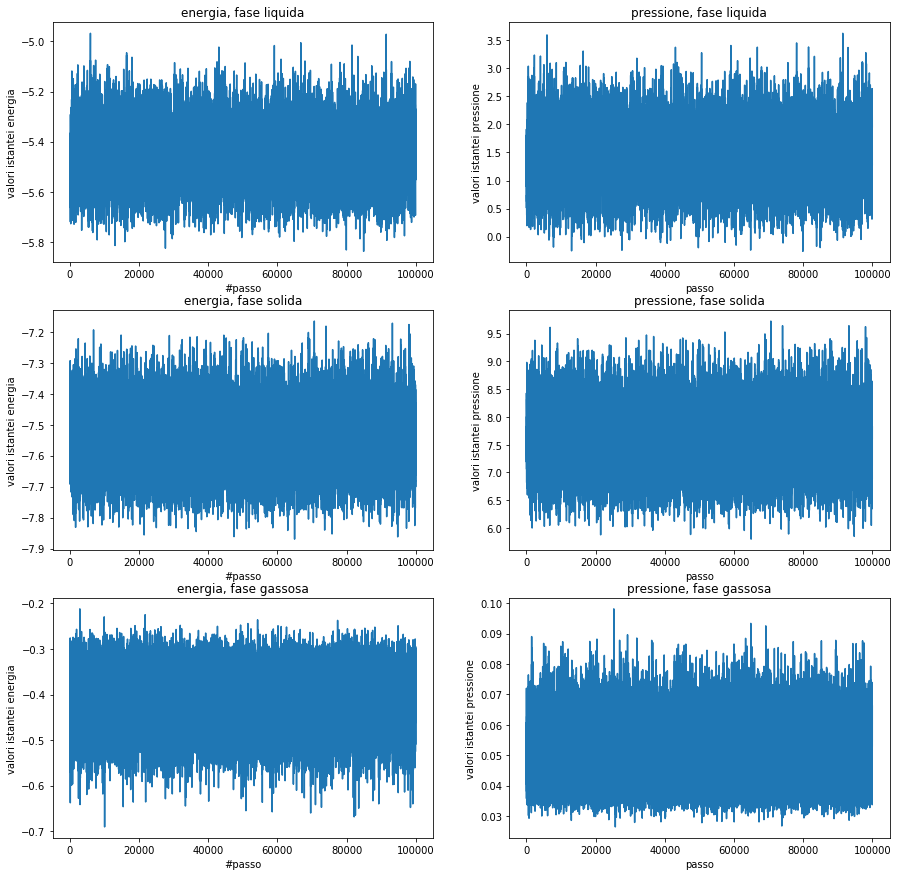

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
n, e_liquido = np.loadtxt("liquido/epot_ist.dat", usecols=(0,1), delimiter=' ',skiprows=1000,unpack=True)
plt.plot(n,e_liquido)
plt.title('energia, fase liquida')
plt.xlabel('#passo')
plt.ylabel('valori istantei energia')

plt.subplot(3,2,2)
n, p_liquido = np.loadtxt("liquido/press_ist.dat", usecols=(0,1), delimiter='\t',skiprows=1000, unpack=True)
plt.plot(n,p_liquido)
plt.title('pressione, fase liquida')
plt.xlabel('passo')
plt.ylabel('valori istantei pressione')

plt.subplot(3,2,3)
n, e_solido = np.loadtxt("solido/epot_ist.dat", usecols=(0,1), delimiter=' ',skiprows=1000,unpack=True)
plt.plot(n,e_solido)
plt.title('energia, fase solida')
plt.xlabel('#passo')
plt.ylabel('valori istantei energia')

plt.subplot(3,2,4)
n, p_solido = np.loadtxt("solido/press_ist.dat", usecols=(0,1), delimiter='\t',skiprows=1000, unpack=True)
plt.plot(n,p_solido)
plt.title('pressione, fase solida')
plt.xlabel('passo')
plt.ylabel('valori istantei pressione')

plt.subplot(3,2,5)
n, e_gas = np.loadtxt("gas/epot_ist.dat", usecols=(0,1), delimiter=' ',skiprows=1000,unpack=True)
plt.plot(n,e_gas)
plt.title('energia, fase gassosa')
plt.xlabel('#passo')
plt.ylabel('valori istantei energia')

plt.subplot(3,2,6)
n, p_gas = np.loadtxt("gas/press_ist.dat", usecols=(0,1), delimiter='\t',skiprows=1000, unpack=True)
plt.plot(n,p_gas)
plt.title('pressione, fase gassosa')
plt.xlabel('passo')
plt.ylabel('valori istantei pressione')

plt.show()


Ho poi implementato il calcolo della funzione di autoccorelazione con il seguente script Python, reppresentato in un grafico l'autocorrelaizone delle misure di energia e pressione istantanee e fittato con un esponenziale.  

L'autocorrelazione:
$$A(\tau)=\frac{\langle x(t)x(t+\tau)\rangle -\langle x(t)\rangle \langle x(t+\tau)\rangle}{\sigma_{x}^2}$$  
fornisce una stima di quanto le quantità che differiscono di un $\tau$ siano correlate tra loro. In particolare il Metropolis genera configurazioni molto correlate tra loro se distanti pochi $\tau$ (dove $1 \tau$ è da leggersi come uno step della simulazione). L'autocorrelazione decade esponenzialmente tramite la legge $A(\tau)=e^{\frac{-\tau}{t_c}}$, con $t_c$ tempo di correlazione.

In [44]:
def autocorrelation(x,tmax):
    x_ave=0
    x2_ave=0
    for n in range(0, len(x)-tmax):
        x_ave=x_ave+x[n]
        x2_ave=x2_ave+x[n]*x[n]        
    x_ave=x_ave/(len(x)-tmax)
    x2_ave=x2_ave/(len(x)-tmax)
    var=x2_ave-x_ave*x_ave
    a=np.zeros(tmax) 
    for t in range(0,tmax):
        ave_1=0
        ave_2=0       
        for j in range(0,len(x)-tmax):
            ave_1=ave_1+x[j]*x[j+t]
        for i in range(0,len(x)-tmax):
            ave_2=ave_2+x[i+t]
        a[t]=((ave_1/(len(x)-tmax))-(x_ave*ave_2/(len(x)-tmax)))/(var)
    
    return a

#-------------------------------------------------------------------------------------

ascisse=np.zeros(500)
auto_energia_liquido=autocorrelation(e_liquido,len(ascisse))
auto_energia_solido=autocorrelation(e_solido,len(ascisse))
auto_energia_gas=autocorrelation(e_gas,len(ascisse))

auto_pressione_liquido=autocorrelation(p_liquido,len(ascisse))
auto_pressione_solido=autocorrelation(p_solido,len(ascisse))
auto_pressione_gas=autocorrelation(p_gas,len(ascisse))

for  n in range(0, len(ascisse)):
    ascisse[n]=n   
    

Energia, fase liquida, tempo di correlazione:  19.984618071478444
Pressione, fase liquida, tempo di correlazione:  24.944020669139164
Energia, fase solida, tempo di correlazione:  9.355713174846793
Pressione, fase solida, tempo di correlazione:  9.232912113825757
Energia, fase gassosa, tempo di correlazione:  3.124577352875956
Pressione, fase gassosa, tempo di correlazione:  0.8653739836197448


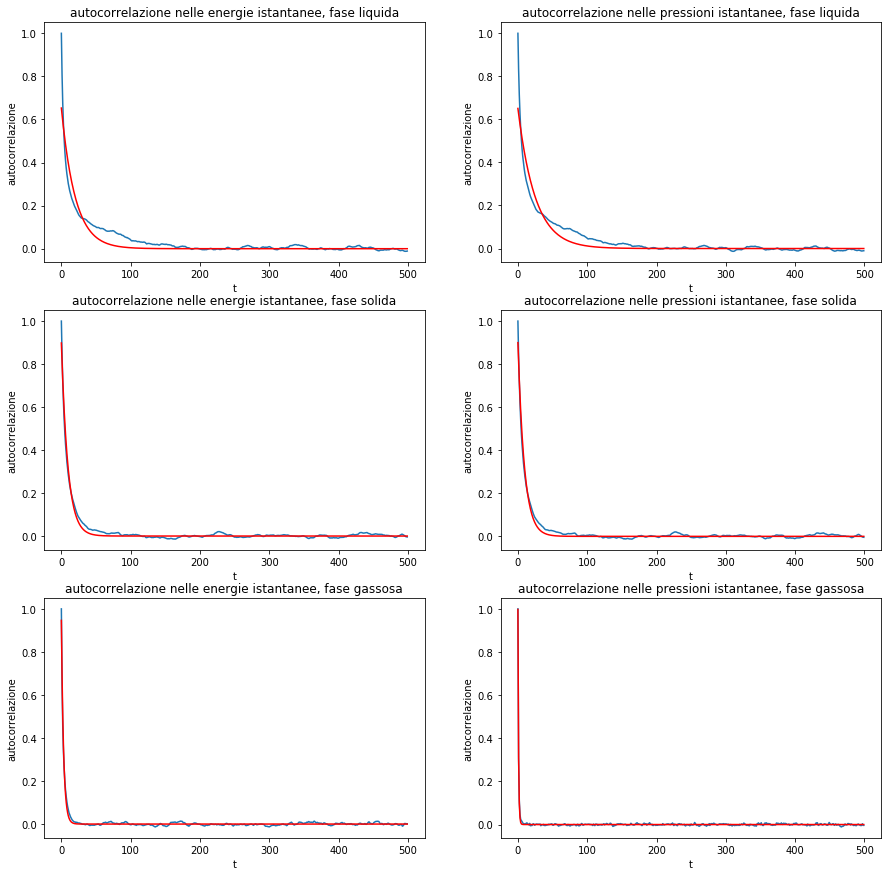

In [48]:
from scipy.optimize import curve_fit
def g(x,a,b):  # defining the fitting function
    return a*np.exp(-b*x)

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(ascisse,auto_energia_liquido)
plt.title('autocorrelazione nelle energie istantanee, fase liquida')
plt.xlabel('t')
plt.ylabel('autocorrelazione')
p_opt, p_cov = curve_fit(g,ascisse,auto_energia_liquido)    
y_fit =g(ascisse,p_opt[0],p_opt[1])
plt.plot(ascisse,y_fit,label='fit', c='red') # plotting fitted function

print("Energia, fase liquida, tempo di correlazione: ",1/p_opt[1])

plt.subplot(3,2,2)
plt.plot(ascisse,auto_pressione_liquido)
plt.title('autocorrelazione nelle pressioni istantanee, fase liquida')
plt.xlabel('t')
plt.ylabel('autocorrelazione')
p_opt, p_cov = curve_fit(g,ascisse,auto_pressione_liquido)    
y_fit =g(ascisse,p_opt[0],p_opt[1])
plt.plot(ascisse,y_fit,label='fit', c='red') # plotting fitted function

print("Pressione, fase liquida, tempo di correlazione: ",1/p_opt[1])

plt.subplot(3,2,3)
plt.plot(ascisse,auto_energia_solido)
plt.title('autocorrelazione nelle energie istantanee, fase solida')
plt.xlabel('t')
plt.ylabel('autocorrelazione')
p_opt, p_cov = curve_fit(g,ascisse,auto_energia_solido)    
y_fit =g(ascisse,p_opt[0],p_opt[1])
plt.plot(ascisse,y_fit,label='fit', c='red')
         
print("Energia, fase solida, tempo di correlazione: ",1/p_opt[1])
         
plt.subplot(3,2,4)
plt.plot(ascisse,auto_pressione_solido)
plt.title('autocorrelazione nelle pressioni istantanee, fase solida')
plt.xlabel('t')
plt.ylabel('autocorrelazione')
p_opt, p_cov = curve_fit(g,ascisse,auto_pressione_solido)    
y_fit =g(ascisse,p_opt[0],p_opt[1])
plt.plot(ascisse,y_fit,label='fit', c='red') 
         
print("Pressione, fase solida, tempo di correlazione: ",1/p_opt[1])
         
plt.subplot(3,2,5)
plt.plot(ascisse,auto_energia_gas)
plt.title('autocorrelazione nelle energie istantanee, fase gassosa')
plt.xlabel('t')
plt.ylabel('autocorrelazione')
p_opt, p_cov = curve_fit(g,ascisse,auto_energia_gas)    
y_fit =g(ascisse,p_opt[0],p_opt[1])
plt.plot(ascisse,y_fit,label='fit', c='red')
         
print("Energia, fase gassosa, tempo di correlazione: ",1/p_opt[1])
         
plt.subplot(3,2,6)
plt.plot(ascisse,auto_pressione_gas)
plt.title('autocorrelazione nelle pressioni istantanee, fase gassosa')
plt.xlabel('t')
plt.ylabel('autocorrelazione')
p_opt, p_cov = curve_fit(g,ascisse,auto_pressione_gas)    
y_fit =g(ascisse,p_opt[0],p_opt[1])
plt.plot(ascisse,y_fit,label='fit', c='red')
         
print("Pressione, fase gassosa, tempo di correlazione: ",1/p_opt[1])

plt.show()


Fittando con gli esponenziali (in rosso nei grafici), ho potuto ricavare i tempi di correlazione, stampati a video.  
Questo suggerisce di usare blocchi che siano lunghi qualche volta (dieci volte, per esempio) il tempo di correlazione.


Ho poi realizzato il seguente script Python per studiare l'errore statistico dei valori di aspettazione di $U/T$ e $P$ al variare delle dimensioni dei blocchi, che ho fatto variare da $L=10$ a $L=5\times10^3$. 

In [90]:
def errore(vett, n):
    media=0
    media_blocco=0
    media_2=0
    L=int(vett.size/n)
    for i in range (int(n)):
        media_blocco=0
        for t in range (int(i*L),int(i*L+L)):
            media_blocco+=vett[t]/L
        media+=media_blocco
        media_2+=media_blocco*media_blocco;
        
    err=((media_2/(n)-media*media/(n*n))/(n-1))**0.5
    return err
    

In [101]:
N=np.zeros(14)
N[0]=20
N[1]=25
N[2]=50
N[3]=100
N[4]=200
N[5]=250
N[6]=500
N[7]=800
N[8]=1000
N[9]=1250
N[10]=2000
N[11]=2500
N[12]=5000
N[13]=10000
errori_e_solido=np.zeros(N.size)
errori_e_liquido=np.zeros(N.size)
errori_e_gas=np.zeros(N.size)
errori_p_solido=np.zeros(N.size)
errori_p_liquido=np.zeros(N.size)
errori_p_gas=np.zeros(N.size)
k=0
for i in N:
    errori_e_solido[k]=errore(e_solido, i)
    errori_e_liquido[k]=errore(e_liquido,i)
    errori_e_gas[k]=errore(e_gas,i)
    errori_p_solido[k]=errore(p_solido,i)
    errori_p_liquido[k]=errore(p_liquido,i)
    errori_p_gas[k]=errore(p_gas,i)
    k=k+1

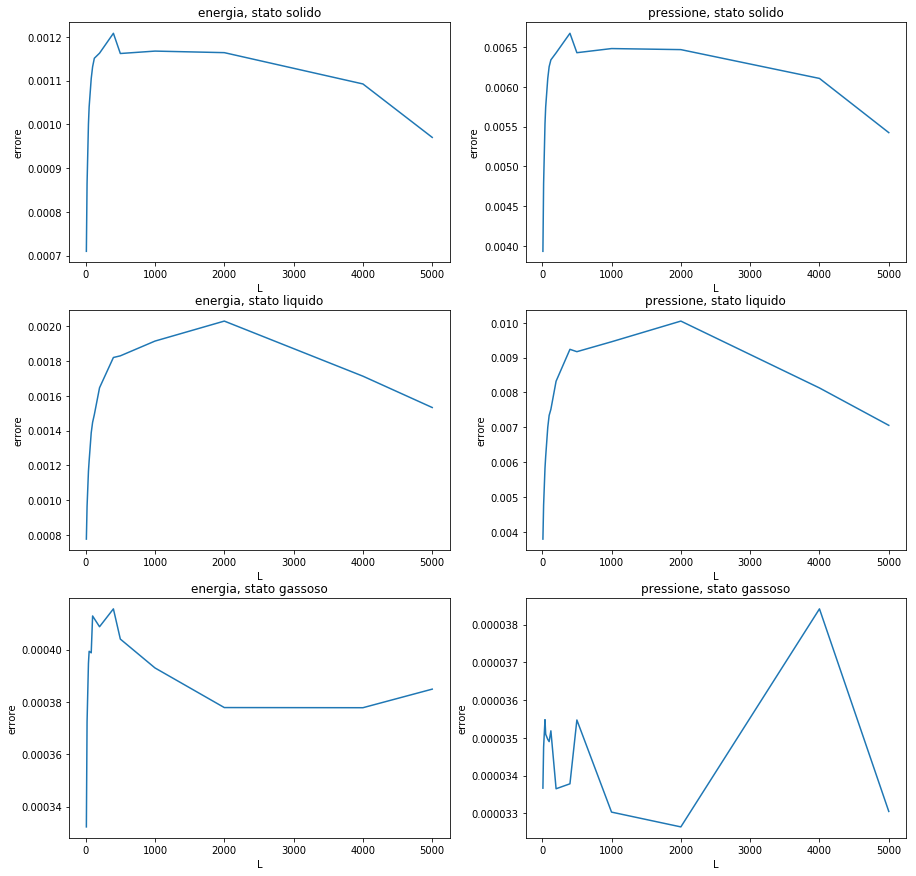

In [102]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(100000/N,errori_e_solido)
plt.title('energia, stato solido')
plt.xlabel('L')
plt.ylabel('errore')

plt.subplot(3,2,2)
plt.plot(100000/N,errori_p_solido)
plt.title('pressione, stato solido')
plt.xlabel('L')
plt.ylabel('errore')

plt.subplot(3,2,3)
plt.plot(100000/N,errori_e_liquido)
plt.title('energia, stato liquido')
plt.xlabel('L')
plt.ylabel('errore')

plt.subplot(3,2,4)
plt.plot(100000/N,errori_p_liquido)
plt.title('pressione, stato liquido')
plt.xlabel('L')
plt.ylabel('errore')

plt.subplot(3,2,5)
plt.plot(100000/N,errori_e_gas)
plt.title('energia, stato gassoso')
plt.xlabel('L')
plt.ylabel('errore')

plt.subplot(3,2,6)
plt.plot(100000/N,errori_p_gas)
plt.title('pressione, stato gassoso')
plt.xlabel('L')
plt.ylabel('errore')

plt.show()

Gli errori relativi alle quantità termodinamiche studiate negli stati solido e liquido presentano in modo un trend che dopo L=2000 diventa decrescente; questo suggerisce di usare come dimensione del blocco circa 2000. I grafici che presento sono però costruiti con pochi punti, perchè ho scelto solo alcuni valori di L che dividessero esattamente il numero di punti totale (nel mio caso, M=100000) e questo potrebbe ridurne la significatività. Un'alternativa potrebbe essere quella di scegliere valori L che non dividono in modo esatto M, approssimare poi $N=M/N$ a intero per difetto ed escludere gli ultimi dei 100000 punti acquisiti da questa analisi.  

### <span style="color: #FF5733 "> Esercizio 07.2 e Esercizio 07.4</span>

Ho aggiunto al codice il calcolo della $g(r)$.  
La *radial distribution funcion* $g(r)$ rappresenta la probabilità di trovare una coppia di particelle la cui distanza reciproca è *r*, normalizzata sulla probabilità di avere le particelle distribuite in modo uniforme (situazione di gas ideale).  Nel codice, ho calcolato questa funzione come:  
$$g(r)=\frac{1}{\rho N\Delta V}\langle \sum \sum_{i\ne j=1}^{N} \delta(r-(r_1-r_j)) \rangle $$

Nella funzione *Measure* ho implementato il riempimento dell'istogramma: ad ogni coppia di particelle è associato un *dr* (la loro distanza reciproca), che è a sua volta associato a un particolare bin. Ho poi implementato nella funzione *Averages* la media a blocchi, in particolare sul file *output.gave.0* (che userò in seguito per realizzare i grafici) ho stampato solo i valori di $g(r)$ e i loro errori dell'ultimo blocco.  
Si riportano di seguito i grafici della media e dell'errore dell'energia per particella, della pressione e della $g(r)$.

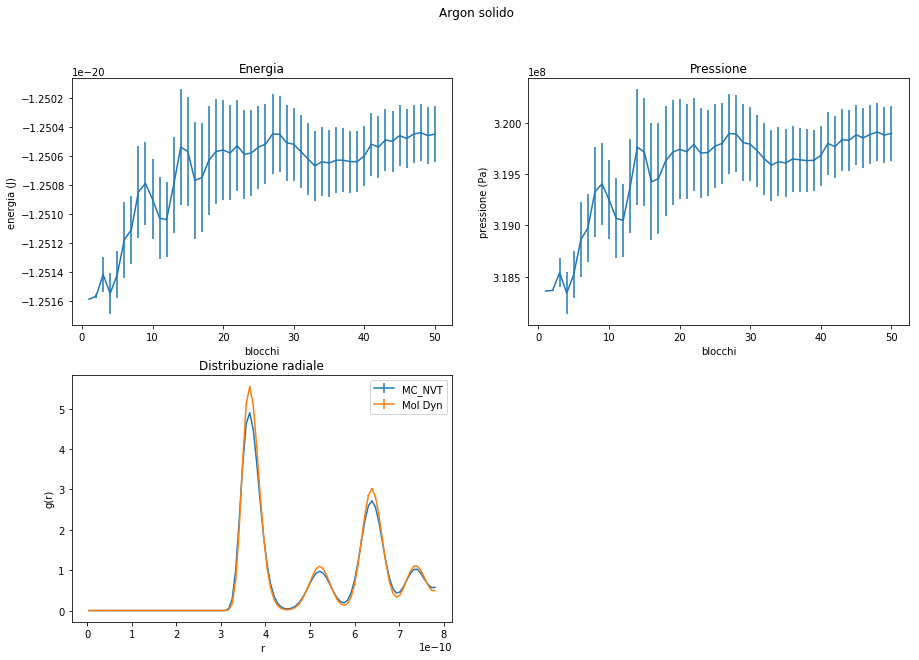

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#Argon solido
plt.figure(figsize=(15,10))
plt.suptitle("Argon solido")
plt.subplot(2,2,1)
n,e,error=np.loadtxt("Argon_solido/output.epot.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(n,e,yerr=error, label="MC_NVT")
plt.xlabel('blocchi')
plt.ylabel('energia (J)')
plt.title('Energia')

plt.subplot(2,2,2)
m,p,error1=np.loadtxt("Argon_solido/output.pres.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(m,p,yerr=error1)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('Pressione')

plt.subplot(2,2,3)
r, g, error = np.loadtxt("Argon_solido/output.gave.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error, label="MC_NVT")
r1,g1,error1=np.loadtxt("Argon_solido/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r1,g1,yerr=error1, label="Mol Dyn")
plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale')

plt.show()

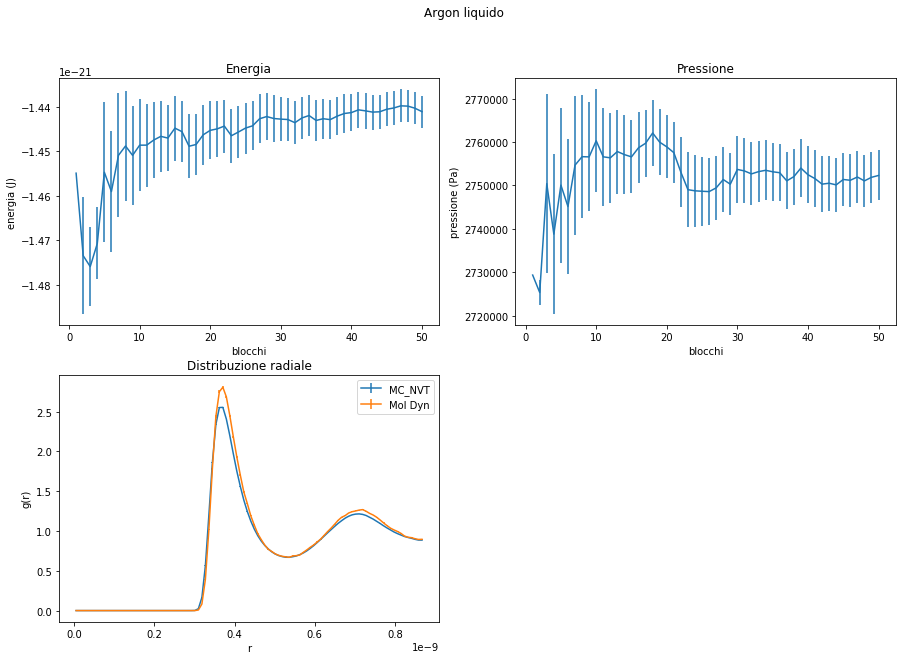

In [13]:
#Argon liquido
plt.figure(figsize=(15,10))
plt.suptitle("Argon liquido")
plt.subplot(2,2,1)
n,e,error=np.loadtxt("Argon_liquido/output.epot.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(n,e,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia (J)')
plt.title('Energia')

plt.subplot(2,2,2)
m,p,error=np.loadtxt("Argon_liquido/output.pres.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(m,p,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('Pressione')

plt.subplot(2,2,3)
r, g, error = np.loadtxt("Argon_liquido/output.gave.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error, label="MC_NVT")
r1,g1,error1=np.loadtxt("Argon_liquido/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r1,g1,yerr=error1, label="Mol Dyn")
plt.xlabel('r')
plt.legend()
plt.ylabel('g(r)')
plt.title('Distribuzione radiale')

plt.show()

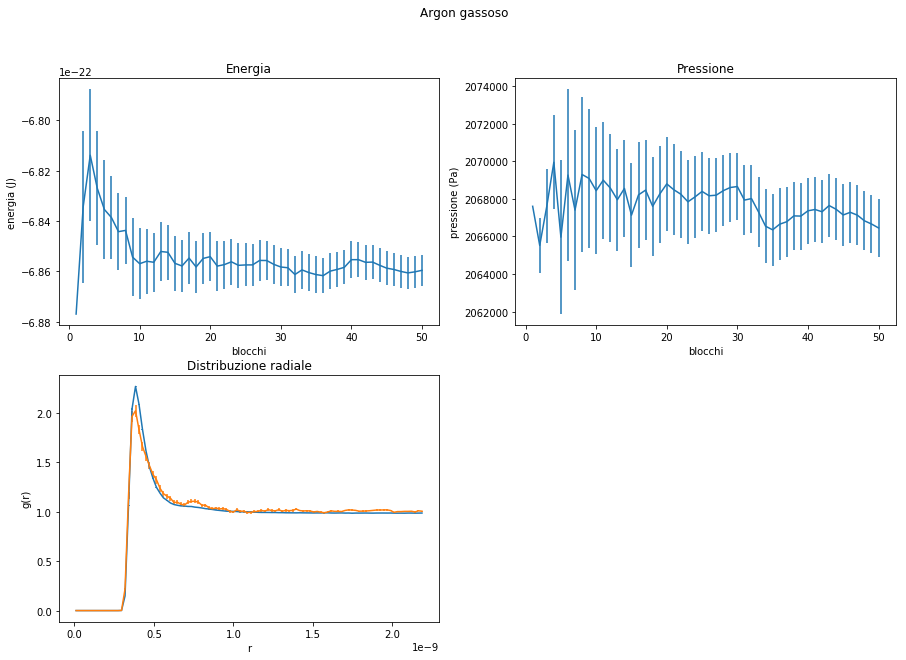

In [10]:
#Argon gassoso
plt.figure(figsize=(15,10))
plt.suptitle("Argon gassoso")
plt.subplot(2,2,1)
n,e,error=np.loadtxt("Argon_gas/output.epot.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(n,e,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia (J)')
plt.title('Energia')

plt.subplot(2,2,2)
m,p,error=np.loadtxt("Argon_gas/output.pres.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(m,p,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('Pressione')

plt.subplot(2,2,3)
r, g, error = np.loadtxt("Argon_gas/output.gave.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error, label="MC_NVT")
r1,g1,error1=np.loadtxt("Argon_gas/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r1,g1,yerr=error1, label="Mol Dyn")
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale')

plt.show()

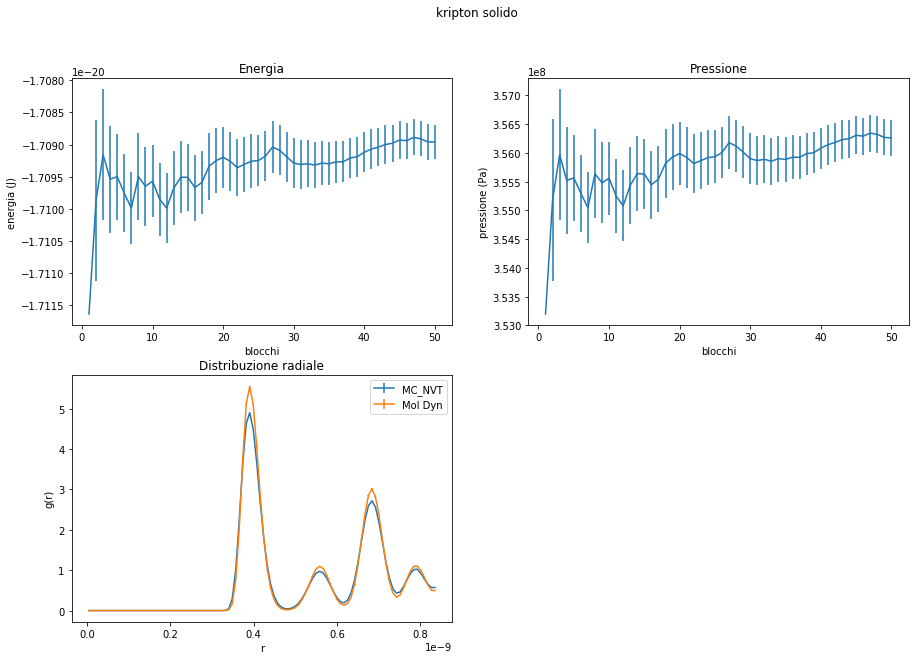

In [22]:
plt.figure(figsize=(15,10))
plt.suptitle("kripton solido")
plt.subplot(2,2,1)
n,e,error=np.loadtxt("Kripton_solido/output.epot.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(n,e,yerr=error, label="MC_NVT")
plt.xlabel('blocchi')
plt.ylabel('energia (J)')
plt.title('Energia')

plt.subplot(2,2,2)
m,p,error1=np.loadtxt("Kripton_solido/output.pres.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(m,p,yerr=error1)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('Pressione')

plt.subplot(2,2,3)
r, g, error = np.loadtxt("Kripton_solido/output.gave.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error, label="MC_NVT")
r1,g1,error1=np.loadtxt("Kripton_solido/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r1,g1,yerr=error1, label="Mol Dyn")
plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale')

plt.show()

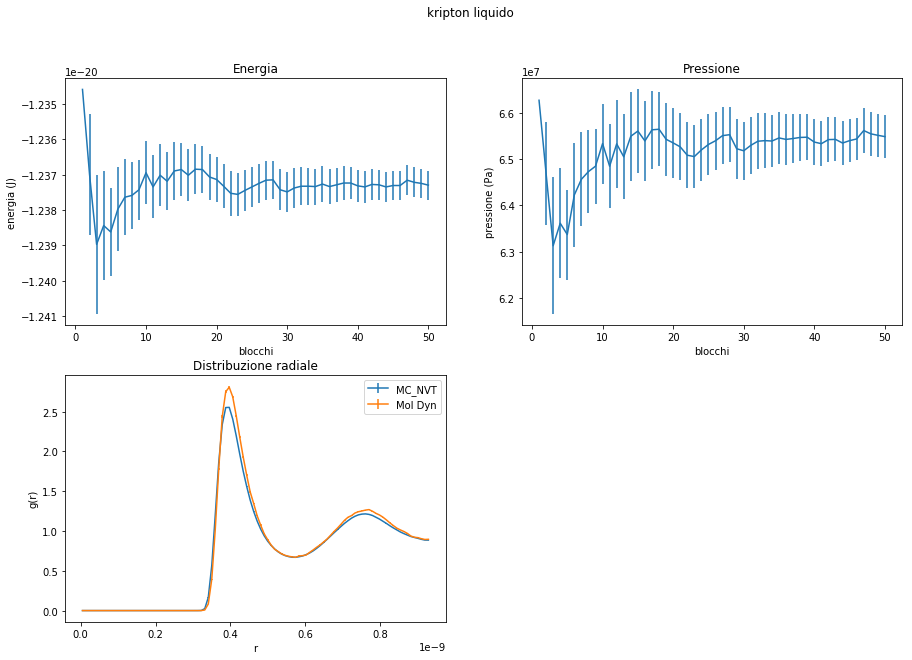

In [23]:
plt.figure(figsize=(15,10))
plt.suptitle("kripton liquido")
plt.subplot(2,2,1)
n,e,error=np.loadtxt("Kripton_liquido/output.epot.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(n,e,yerr=error, label="MC_NVT")
plt.xlabel('blocchi')
plt.ylabel('energia (J)')
plt.title('Energia')

plt.subplot(2,2,2)
m,p,error1=np.loadtxt("Kripton_liquido/output.pres.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(m,p,yerr=error1)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('Pressione')

plt.subplot(2,2,3)
r, g, error = np.loadtxt("Kripton_liquido/output.gave.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error, label="MC_NVT")
r1,g1,error1=np.loadtxt("Kripton_liquido/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r1,g1,yerr=error1, label="Mol Dyn")
plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale')

plt.show()

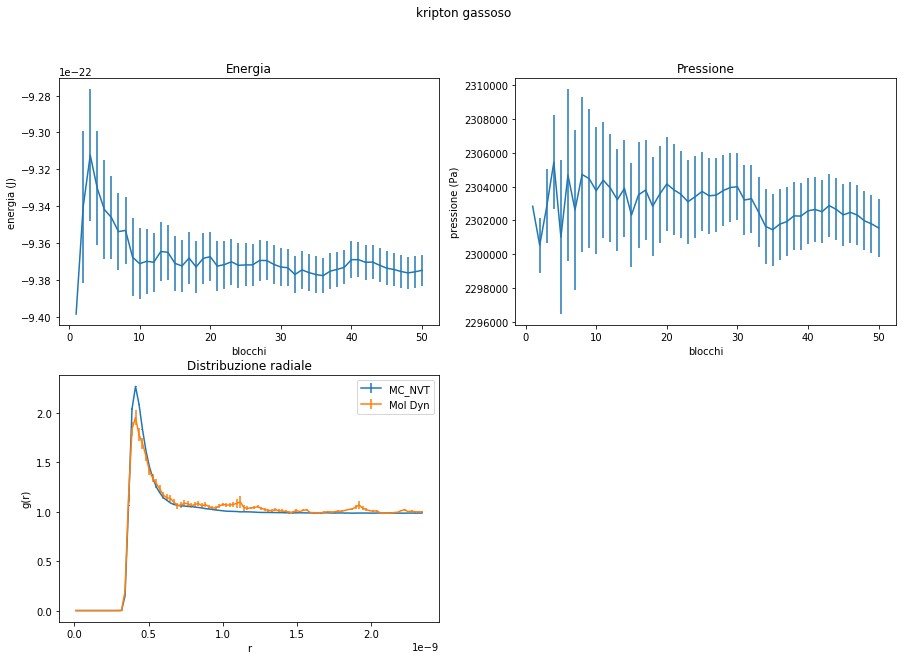

In [24]:
plt.figure(figsize=(15,10))
plt.suptitle("kripton gassoso")
plt.subplot(2,2,1)
n,e,error=np.loadtxt("Kripton_gas/output.epot.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(n,e,yerr=error, label="MC_NVT")
plt.xlabel('blocchi')
plt.ylabel('energia (J)')
plt.title('Energia')

plt.subplot(2,2,2)
m,p,error1=np.loadtxt("Kripton_gas/output.pres.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(m,p,yerr=error1)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('Pressione')

plt.subplot(2,2,3)
r, g, error = np.loadtxt("Kripton_gas/output.gave.0", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error, label="MC_NVT")
r1,g1,error1=np.loadtxt("Kripton_gas/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r1,g1,yerr=error1, label="Mol Dyn")
plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale')

plt.show()

Per gli stati gassosi, la $g(r)$ si appiattisce velocemente sul valore 1, perchè questi stati sono ben approssimati da un gas ideale